In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv("customer.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")
returns = pd.read_csv("return.csv")
ratings = pd.read_csv("ratings.csv")
delivery = pd.read_csv("delivery.csv")
transaction = pd.read_csv("transaction.csv")

In [4]:
customers.info()
orders.info()
products.info()
returns.info()
ratings.info()
delivery.info()
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   C_ID            10000 non-null  object
 1   C_Name          10000 non-null  object
 2   Gender          10000 non-null  object
 3   Age             10000 non-null  int64 
 4   City            10000 non-null  object
 5   State           10000 non-null  object
 6   Street_Address  10000 non-null  object
 7   Mobile          10000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 625.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Or_ID       10000 non-null  object
 1   C_ID        10000 non-null  object
 2   P_ID        10000 non-null  object
 3   Order_Date  10000 non-null  object
 4   Order_Time  10000 non-null  object
 5   Qty      

In [5]:
orders.describe()
transaction.describe()
customers.describe()
products.describe()
returns.describe()
ratings.describe()
delivery.describe()

,DP_Ratings,Percent_Cut
count,5.000000,5.0000
mean,4.000000,21.0000
std,0.707107,4.1833
min,3.000000,15.0000
25%,4.000000,20.0000
50%,4.000000,20.0000
75%,4.000000,25.0000
max,5.000000,25.0000


In [6]:
transaction.duplicated().sum()
customers.duplicated().sum()
orders.duplicated().sum()
products.duplicated().sum()
returns.duplicated().sum()
ratings.duplicated().sum()
delivery.duplicated().sum()


np.int64(0)

In [7]:
orders = orders.drop_duplicates()
orders
orders.isnull().sum()

,0
Or_ID,0
C_ID,0
P_ID,0
Order_Date,0
Order_Time,0
Qty,0
Coupon,0
DP_ID,0
Discount,0


In [8]:
#if there are null values:
# drop nulls - (loss of data)
# fill nulls - (constant, mean, mode, median, ffill, bfill)
#            - if numberic col, use Median
#            - if textual col, use Mode
#            - backward fill and forward fill

#assuming quantity has null values

orders["Qty"] = orders["Qty"].fillna(orders["Qty"].median()) #mean() or mode()
orders["Qty"] = orders["Qty"].ffill() #bfill
print(orders["Qty"])

0        1
1        5
2        1
3       10
4        7
        ..
9995     5
9996     4
9997     6
9998     6
9999     6
Name: Qty, Length: 10000, dtype: int64


In [9]:
orders.head(2)


,Or_ID,C_ID,P_ID,Order_Date,Order_Time,Qty,Coupon,DP_ID,Discount
0,OR_31000001,CS_11005317,PD_21001301,27-02-24,22:02:00,1,No Coupon,DV_61000001,0
1,OR_31000002,CS_11000423,PD_21003593,21-01-24,08:33:31,5,PULL,DV_61000002,25


In [10]:
customers.head(2)

,C_ID,C_Name,Gender,Age,City,State,Street_Address,Mobile
0,CS_11000001,Manbir Lala,Male,67,Delhi,Delhi,"Park Ave, 163 , Delhi , Delhi - 529675",9607971039
1,CS_11000002,Radhika More,Female,51,Pune,Maharashtra,"Elm St, 960 , Pune , Maharashtra - 328062",9109249091


In [11]:
returns.head(2)

,RT_ID,Or_ID,Reason,Return_Refund,Dates
0,RR_301000001,OR_31004141,Wrong Item Shipped,Approved,08-04-23
1,RR_301000002,OR_31008145,Late Delivery,Rejected,13-05-24


In [12]:
ratings.head(2)

,R_ID,Or_ID,Prod_Rating,Delivery_Service_Rating
0,RT_101000001,OR_31009479,4,5
1,RT_101000002,OR_31001385,2,2


In [13]:
transaction.head(2)

,Tr_ID,Or_ID,Transaction_Mode,Reward
0,TR_41000001,OR_31002037,Wallet,No
1,TR_41000002,OR_31008376,Wallet,Yes


In [14]:
products.head(2)


,P_ID,P_Name,Category,Brand_Name,Gender,Price
0,PD_21000001,Distressed Stretch Denim Charcoal Faded Jeans,Jeans,Puma,Unisex,1589
1,PD_21000002,Straight Leg Cotton Blend Light Blue Faded Jeans,Jeans,Gap,Men,2211


In [15]:
customers.dtypes

,0
C_ID,object
C_Name,object
Gender,object
Age,int64
City,object
State,object
Street_Address,object
Mobile,int64


In [16]:
orders.dtypes

,0
Or_ID,object
C_ID,object
P_ID,object
Order_Date,object
Order_Time,object
Qty,int64
Coupon,object
DP_ID,object
Discount,int64


In [17]:
transaction.dtypes

,0
Tr_ID,object
Or_ID,object
Transaction_Mode,object
Reward,object


In [18]:
products.dtypes

,0
P_ID,object
P_Name,object
Category,object
Brand_Name,object
Gender,object
Price,int64


In [19]:
returns.dtypes

,0
RT_ID,object
Or_ID,object
Reason,object
Return_Refund,object
Dates,object


In [20]:
ratings.dtypes

,0
R_ID,object
Or_ID,object
Prod_Rating,int64
Delivery_Service_Rating,int64


In [21]:
##1 Total number of customers
total_customers = customers['C_ID'].nunique()
print("Total Customers:", total_customers)

Total Customers: 10000


In [22]:
##2 Top 5 Cities
top_cities = customers['City'].value_counts().head(5)
print(top_cities)

City
Vadodara    531
Surat       529
Jaipur      525
Kanpur      520
Patna       518
Name: count, dtype: int64


In [23]:
##3 Number of unique products, categories, brands
unique_products = products['P_ID'].nunique()
unique_categories = products['Category'].nunique()
unique_brands = products['Brand_Name'].nunique()
print("Unique Products:", unique_products)
print("Unique Categories:", unique_categories)
print("Unique Brands:", unique_brands)

Unique Products: 10000
Unique Categories: 10
Unique Brands: 10


In [24]:
##4  Top 10 expensive vs cheap products
top_10_expensive = products.nlargest(10, 'Price')
top_10_cheap = products.nsmallest(10, 'Price')
print("Top 10 Expensive Products:")
print(top_10_expensive)
print("\nTop 10 Cheap Products:")
print(top_10_cheap)

Top 10 Expensive Products:
             P_ID                                             P_Name Category  \
1156  PD_21001157                 A-Line Tulle Brown Polka Dot Skirt    Skirt   
7327  PD_21007328  Flared Selvedge Denim Dark Blue Embroidered Jeans    Jeans   
3518  PD_21003519            Asymmetrical Velvet Brown Striped Skirt    Skirt   
4956  PD_21004957         High-Waisted Linen Beige Colorblock Shorts   Shorts   
8242  PD_21008243  Single-Breasted Polyester Dark Green Textured ...   Blazer   
6037  PD_21006038  Bootcut Recycled Denim Light Blue Acid Washed ...    Jeans   
8143  PD_21008144           Pullover Alpaca Navy Blue Ribbed Sweater  Sweater   
1809  PD_21001810            Flared Acid Wash Gray Acid Washed Jeans    Jeans   
3453  PD_21003454                     Formal Rayon Brown Solid Shirt    Shirt   
1118  PD_21001119               Longline Spandex Brown Solid T-Shirt  T-Shirt   

     Brand_Name  Gender  Price  
1156     Levi's  Unisex   3000  
7327       Nike

In [25]:
##5  Category with highest avg discount

# calculated discount_percentage
orders_products = orders.merge(products, on="P_ID", how="left")
if 'Discount' in orders_products.columns:
    orders_products['Final_Price'] = orders_products['Price'] - orders_products['Discount']
    orders_products['Discount_Percentage'] = (orders_products['Discount'] / orders_products['Price']) * 100

print("orders_products['Final_Price']", orders_products['Final_Price'])
print("orders_products['Discount_Percentage']", orders_products['Discount_Percentage'])



orders_products['Final_Price'] 0       2300
1        606
2        836
3        837
4       2221
        ... 
9995    1659
9996     689
9997    2012
9998    1872
9999    2151
Name: Final_Price, Length: 10000, dtype: int64
orders_products['Discount_Percentage'] 0       0.000000
1       3.961965
2       0.000000
3       1.180638
4       0.448229
          ...   
9995    0.896057
9996    0.000000
9997    0.000000
9998    1.057082
9999    0.000000
Name: Discount_Percentage, Length: 10000, dtype: float64


In [26]:
avg_discount_by_category = orders_products.groupby('Category')['Discount_Percentage'].mean().sort_values(ascending=False)

print("Average Discount by Category:\n", avg_discount_by_category)

# Highest discount category
top_category = avg_discount_by_category.idxmax()
top_discount = avg_discount_by_category.max()
print(f"\nCategory with Highest Avg Discount: {top_category} ({top_discount:.2f}%)")


Average Discount by Category:
 Category
Shorts     0.705956
Jacket     0.656838
Sweater    0.654655
Dress      0.645908
Shirt      0.644772
T-Shirt    0.642047
Hoodie     0.641926
Jeans      0.618496
Skirt      0.600320
Blazer     0.599887
Name: Discount_Percentage, dtype: float64

Category with Highest Avg Discount: Shorts (0.71%)


In [27]:
##6   Total orders
Total_Orders = orders['Or_ID'].nunique()
print("Total Orders:", Total_Orders)



Total Orders: 10000


/tmp/ipython-input-3424793620.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  orders['Order_Date'] = pd.to_datetime(orders['Order_Date'])


Monthly Trend of Orders:
 year_month
2023-01    429
2023-02    403
2023-03    445
2023-04    416
2023-05    406
2023-06    399
2023-07    397
2023-08    408
2023-09    376
2023-10    391
Freq: M, Name: Or_ID, dtype: int64


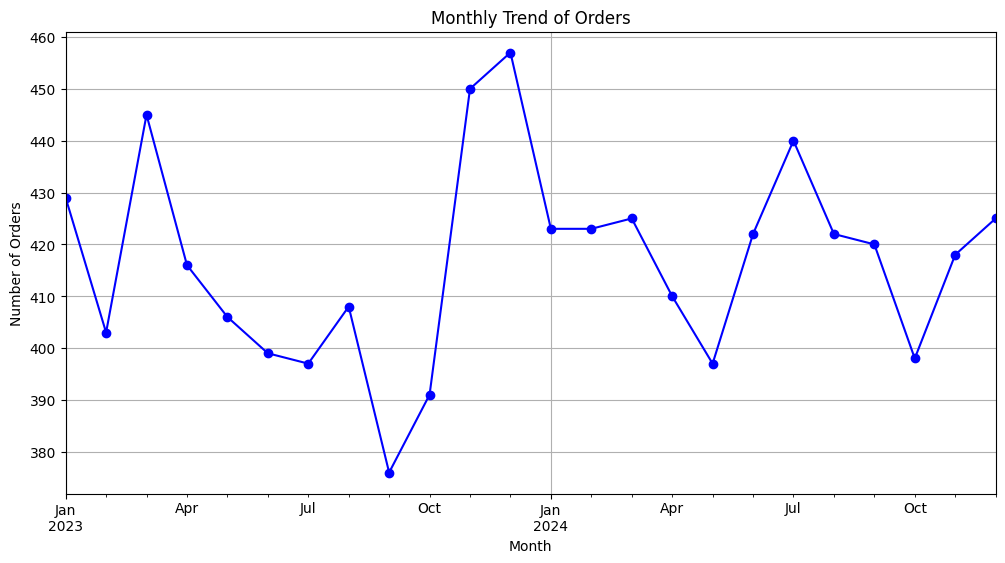

In [28]:
##7  Monthly trend of orders (seasonality)

# Convert order_date to datetime
orders['Order_Date'] = pd.to_datetime(orders['Order_Date'])

# Extract Year-Month
orders['year_month'] = orders['Order_Date'].dt.to_period('M')

# Count orders per month
monthly_orders = orders.groupby('year_month')['Or_ID'].count()

print("Monthly Trend of Orders:\n", monthly_orders.head(10))

# ---- Optional: Visualization ----
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6) )
monthly_orders.plot(kind='line', marker='o',color="blue")
plt.title("Monthly Trend of Orders")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.show()


In [29]:
##8  Top customers by number of orders

Top_customers = orders.groupby('C_ID')['Or_ID'].count().sort_values(ascending=False).head(10)
print("Top Customers by Number of Orders:\n", Top_customers)


# Merge top customers with customers table
top_customers_df = Top_customers.reset_index().merge(customers, on="C_ID", how="left")

print(top_customers_df)


Top Customers by Number of Orders:
 C_ID
CS_11008968    7
CS_11007611    6
CS_11007911    6
CS_11005093    6
CS_11008868    6
CS_11004286    5
CS_11007833    5
CS_11007761    5
CS_11001754    5
CS_11007700    5
Name: Or_ID, dtype: int64
          C_ID  Or_ID           C_Name  Gender  Age           City  \
0  CS_11008968      7   Tanish Bhavsar  Female   43         Mumbai   
1  CS_11007611      6     Vedhika Mane  Female   55        Lucknow   
2  CS_11007911      6       Leela Dani    Male   34        Lucknow   
3  CS_11005093      6    Vasudha Devan    Male   48      Bengaluru   
4  CS_11008868      6   Wakeeta Bakshi  Female   31  Visakhapatnam   
5  CS_11004286      5      Harsh Andra  Female   20          Surat   
6  CS_11007833      5       Indali Das  Female   52       Vadodara   
7  CS_11007761      5      Mitesh Raju    Male   31  Visakhapatnam   
8  CS_11001754      5  Bishakha Khalsa  Female   46        Chennai   
9  CS_11007700      5    Aarav Chaudry  Female   66      Bengal

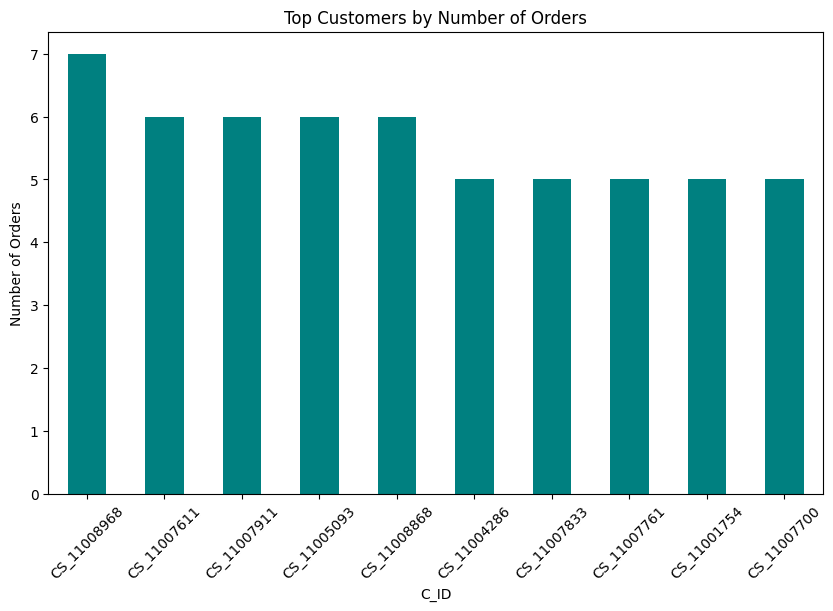

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
Top_customers.plot(kind="bar", color="teal")
plt.title("Top Customers by Number of Orders")
plt.xlabel("C_ID")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()


In [31]:
##9  Payment methods used (COD, UPI, Cards, Wallets, etc.)

payment_methods = transaction['Transaction_Mode'].value_counts()
print("Payment Methods Used:\n", payment_methods)

Payment Methods Used:
 Transaction_Mode
Net Banking    2057
Debit Card     2011
Credit Card    1980
UPI            1978
Wallet         1974
Name: count, dtype: int64


In [32]:
## 10  Average transaction value

orders_products_transaction = transaction.merge(orders_products, on="Or_ID", how="left")
print(orders_products_transaction)

# Total amount
total_amount = orders_products_transaction['Price'].sum()
print("Total_Amount:" , total_amount)

# Total transactions
total_transactions = transaction['Tr_ID'].nunique()
print("Total_Transaction:" , total_transactions)

# Average transaction value
avg_transaction_value = total_amount / total_transactions

print(f"Average Transaction Value: {avg_transaction_value:.2f}")


            Tr_ID        Or_ID Transaction_Mode Reward         C_ID  \
0     TR_41000001  OR_31002037           Wallet     No  CS_11008768   
1     TR_41000002  OR_31008376           Wallet    Yes  CS_11009715   
2     TR_41000003  OR_31002152              UPI     No  CS_11004712   
3     TR_41000004  OR_31009239      Credit Card    Yes  CS_11002565   
4     TR_41000005  OR_31002891       Debit Card     No  CS_11007058   
...           ...          ...              ...    ...          ...   
9995  TR_41009996  OR_31000163              UPI    Yes  CS_11005363   
9996  TR_41009997  OR_31002044           Wallet    Yes  CS_11007814   
9997  TR_41009998  OR_31004604              UPI    Yes  CS_11004676   
9998  TR_41009999  OR_31001672           Wallet     No  CS_11003499   
9999  TR_41010000  OR_31005370           Wallet     No  CS_11009394   

             P_ID Order_Date Order_Time  Qty     Coupon        DP_ID  \
0     PD_21002236   31-07-24   10:29:19    2        CUT  DV_61000002   
1  

In [33]:
## 11 Return rate by category

orders_products_return = returns.merge(orders_products, on="Or_ID", how="left")
print(orders_products_return)

total_orders = orders_products.groupby("Category").agg(total_orders=("Or_ID", "count"))

# Returned orders by category
returned_orders = orders_products.groupby("Category").agg(returned_orders=("Or_ID", "count"))

# Combine & calculate return rate
return_rate = total_orders.merge(returned_orders, on="Category", how="left").fillna(0)
return_rate["return_rate_%"] = (return_rate["returned_orders"] / return_rate["total_orders"]) * 100

print("Return Rate by Category Table")

print(return_rate.sort_values("return_rate_%", ascending=False))

             RT_ID        Or_ID              Reason Return_Refund     Dates  \
0     RR_301000001  OR_31004141  Wrong Item Shipped      Approved  08-04-23   
1     RR_301000002  OR_31008145       Late Delivery      Rejected  13-05-24   
2     RR_301000003  OR_31005212  Wrong Item Shipped      Approved  01-11-23   
3     RR_301000004  OR_31006318       Late Delivery      Rejected  16-05-24   
4     RR_301000005  OR_31007423   Defective Product      Approved  10-06-23   
...            ...          ...                 ...           ...       ...   
1995  RR_301001996  OR_31007159       Late Delivery      Approved  15-12-23   
1996  RR_301001997  OR_31002005   Defective Product      Approved  05-08-23   
1997  RR_301001998  OR_31001976   Defective Product      Approved  20-06-24   
1998  RR_301001999  OR_31009400  Wrong Item Shipped      Approved  21-09-24   
1999  RR_301002000  OR_31005780   Defective Product      Rejected  05-05-23   

             C_ID         P_ID Order_Date Order_Tim

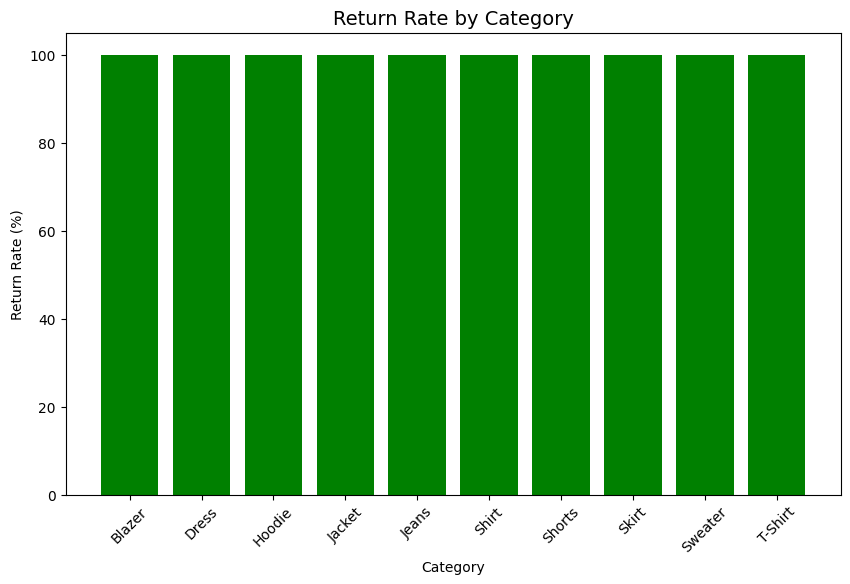

In [34]:
return_rate_sorted = return_rate.sort_values("return_rate_%", ascending=False)

plt.figure(figsize=(10,6))
plt.bar(return_rate_sorted.index, return_rate_sorted["return_rate_%"], color="green")

plt.title("Return Rate by Category", fontsize=14)
plt.xlabel("Category")
plt.ylabel("Return Rate (%)")
plt.xticks(rotation=45)
plt.show()

In [35]:
## 12 Brands with highest return %
# Total orders by brand
total_orders_brand = orders_products.groupby("Brand_Name").agg(total_orders=("Or_ID", "count"))

# Returned orders by brand
returns_full = returns.merge(orders_products, on="Or_ID", how="left")
returned_orders_brand = returns_full.groupby("Brand_Name").agg(returned_orders=("Or_ID", "count"))

# Combine & calculate return %
brand_return_rate = total_orders_brand.merge(returned_orders_brand, on="Brand_Name", how="left").fillna(0)
brand_return_rate["return_rate_%"] = (brand_return_rate["returned_orders"] / brand_return_rate["total_orders"]) * 100

# Sort to see top brands with highest return %
top_brands_return = brand_return_rate.sort_values("return_rate_%", ascending=False)
print("Brands with highest return %")

print(top_brands_return.head(10))


Brands with highest return %
            total_orders  returned_orders  return_rate_%
Brand_Name                                              
Pantaloons           997              220      22.066199
Levi's               972              207      21.296296
H&M                 1006              206      20.477137
Zara                1015              207      20.394089
Uniqlo               977              199      20.368475
Nike                 909              182      20.022002
Puma                1138              224      19.683656
Adidas               960              184      19.166667
Gap                  951              182      19.137750
Reebok              1075              189      17.581395


In [36]:
## 13 Top Delivery Partner by Rating
top_dp = delivery.sort_values("DP_Ratings", ascending=False).head(5)
print(top_dp)


         DP_ID       DP_name  DP_Ratings  Percent_Cut
0  DV_61000001     Delhivery           5           25
1  DV_61000002  Ecom Express           4           20
2  DV_61000003     Blue Dart           4           25
3  DV_61000004    Xpressbees           4           20
4  DV_61000005     Shadowfax           3           15


In [15]:
## 14  Average commission cut
avg_cut = delivery["Percent_Cut"].mean()
print(f"Average Commission Cut: {avg_cut:.2f}%")


Average Commission Cut: 21.00%


In [16]:
## 15 Correlation between ratings & cut
correlation = delivery["DP_Ratings"].corr(delivery["Percent_Cut"])
print(f"Correlation between ratings and commission cut: {correlation:.2f}")


Correlation between ratings and commission cut: 0.85


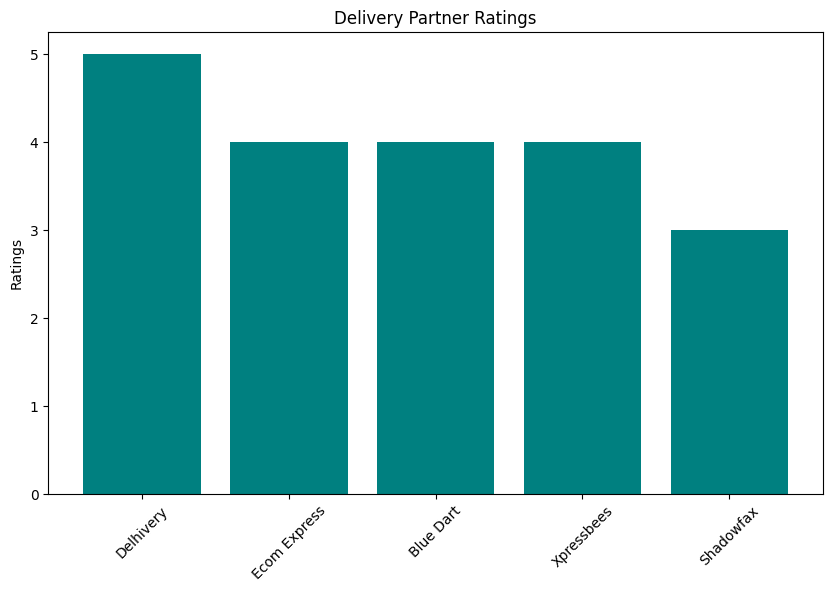

In [38]:
## 16 Bar chart – Ratings vs Partners
plt.figure(figsize=(10,6))
plt.bar(delivery["DP_name"], delivery["DP_Ratings"], color="teal")
plt.xticks(rotation=45)
plt.ylabel("Ratings")
plt.title("Delivery Partner Ratings")
plt.show()